# LINEAR EQUATION

1. Diberikan sistem persamaan linier 4 variabel.
2. Periksa apakah matriks koefisien bersifat **dominasi diagonal** secara programatik.
3. Jika **tidak dominan diagonal**, tampilkan pesan kesalahan.
4. Jika **dominan diagonal**, gunakan metode **Gauss-Seidel** dengan:
    - Maksimal iterasi: 20
    - Nilai awal semua variabel: **0**
    - Ambang batas konvergensi **ϵ = 0.0xx**, di mana `xx` adalah dua digit jam saat pengerjaan.
    
    *misal
    Pukul : 20:02
    **ϵ = 0.002**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
Xs = [
    [
        [8, 4, 2],
        [1, 6, 3],
        [5, 6, 12]
    ],
    [
        [12, -7, -1],
        [1, -7, 2],
        [8, -1, 12]
    ],
    [
        [4, 2, 7],
        [3, -7, 5],
        [2, -1, 3]
    ],
    [   
        [14, 2, 1],
        [1, 8, 4],
        [9, 8, 18]
    ],
    [   
        [1, 3, 6],
        [9, 1, 12],
        [15, 18, 1]
    ]
]
Ys = [
    [10, 12, 15],
    [21, 12, 4],
    [8, 4, 5],
    [7, 2, 6],
    [4, 7, 6]
]

def diagonal_dominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis = 1) - diag
    result = np.all(diag > off_diag)
    return result

def gauss_seidel(matrix_id, x, y, tolerance = 0.041, iter = 20):
    print(f"Matrix #{matrix_id}:")
    if not (diagonal_dominant):
        print("Not diagonally dominant")
        return

    x = np.array(x)
    y = np.array(y)

    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_x = np.zeros(len(x[0]))

    for i in range(iter):
        new_x = np.array(old_x)

        for idx, row in enumerate(x):
            new_x[idx] = (y[idx] + np.dot(row, new_x)) / diag[idx]

        print(f"Iteration {i + 1}: {new_x}")

        distance = np.sqrt(np.dot(old_x - new_x, old_x - new_x))

        if distance < tolerance:
            print("Converged")
            print(f"{new_x}")
            return new_x

        old_x = new_x
for i in range(len(Xs)):
    gauss_seidel(i+1, Xs[i], Ys[i])
    print()

Matrix #1:
Iteration 1: [ 1.25        1.79166667 -0.16666667]
Iteration 2: [0.39583333 2.01736111 0.07638889]
Iteration 3: [0.22222222 1.92476852 0.19502315]
Iteration 4: [0.23885995 1.86267843 0.2191358 ]
Iteration 5: [0.26387683 1.84645263 0.21682501]
Converged
[0.26387683 1.84645263 0.21682501]

Matrix #2:
Iteration 1: [ 1.75       -1.46428571 -0.95535714]
Iteration 2: [ 0.81622024 -1.87064201 -0.36670033]
Iteration 3: [ 0.6282338  -1.72930955 -0.22959833]
Iteration 4: [ 0.7221029  -1.67672768 -0.28779591]
Iteration 5: [ 0.74792586 -1.68966656 -0.30608945]
Converged
[ 0.74792586 -1.68966656 -0.30608945]

Matrix #3:
Iteration 1: [2.         0.28571429 0.42857143]
Iteration 2: [1.10714286 0.20918367 0.99829932]
Iteration 3: [0.14838435 0.20523567 1.63615565]
Iteration 4: [-0.96589023  0.18330108  2.37169384]
Iteration 5: [-2.24211477  0.16173213  3.21532056]
Iteration 6: [-3.70767704  0.13622452  4.18385953]
Iteration 7: [-5.38986645  0.10709976  5.29561089]
Iteration 8: [-7.32086893 

# REGRESSION & PLOTTING

Create a Least Square Regression from the matrix (x, y) in snippet below, then print the value of ‘m’ and ‘c’ from the formula of “y = mx + c”. Lastly, Show the original matrix and the result of Least Square Regression in one plot using matplotlib (with legend).

m = 0.4863992308478565
c = 4.955208076097511


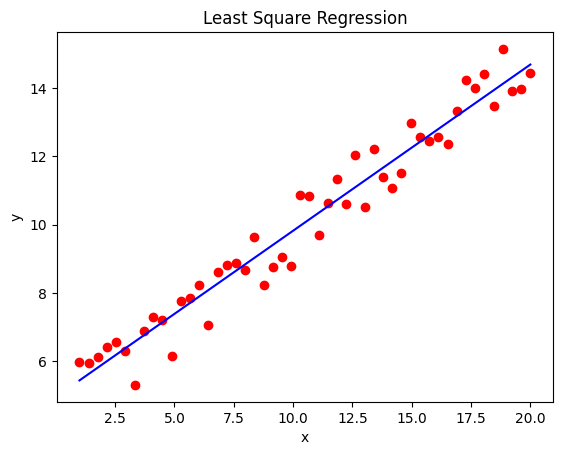

In [9]:
x = [1.00, 1.39, 1.78, 2.16, 2.55, 2.94, 3.33, 3.71, 4.10, 4.49, 4.88, 5.27, 5.65, 6.04, 6.43, 6.82, 7.20, 7.59, 7.98, 8.37, 8.76, 9.14, 9.53, 9.92, 10.31, 10.69, 11.08, 11.47, 11.86, 12.24, 12.63, 13.02, 13.41, 13.80, 14.18, 14.57, 14.96, 15.35, 15.73, 16.12, 16.51, 16.90, 17.29, 17.67, 18.06, 18.45, 18.84, 19.22, 19.61, 20.00]

y = [5.97, 5.95, 6.13, 6.41, 6.57, 6.30, 5.31, 6.90, 7.30, 7.22, 6.15, 7.77, 7.84, 8.24, 7.05, 8.61, 8.83, 8.87, 8.67, 9.63, 8.24, 8.76, 9.06, 8.80, 10.88, 10.83, 9.71, 10.63, 11.33, 10.61, 12.04, 10.51, 12.20, 11.40, 11.07, 11.50, 12.98, 12.56, 12.44, 12.57, 12.36, 13.32, 14.22, 14.01, 14.42, 13.48, 15.14, 13.92, 13.97, 14.44]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = y[:, np.newaxis]

alpha = np.linalg.inv(np.dot(A.T,A))
alpha = np.dot(alpha, A.T)
alpha = np.dot(alpha, Y)

m, c = alpha[0,0], alpha[1,0]

print(f"m = {m}")
print(f"c = {c}")

plt.plot(x, y, "ro")
plt.plot(x, m * x + c, "-b")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Square Regression")
plt.show()

# NEWTON RAPHSON

Find the root of the equation from the equation f(x) below by using **Newton Raphson** method:

```yaml
f(x): 8x5 - 10x4 + x3 + 2x2 + 9x + 13
```

- How many **iterations** are required to find the root of the equation?
- With first guess of the value is 5
- With **tolerate error** is **0xx** with **xx** are the last digits of your NIM (e.g., 25012345**31**, then the last digits of the NIM are **31**)
- With the number of the **max iterations** is **50**

In [10]:
def f(x):
    return 8 * (x ** 5) - 10 * (x ** 4) + (x ** 3) + 2 * (x ** 2) + 9 * x + 13

def g(x):
    return 40 * (x ** 4) - 40 * (x ** 3) + 3 * (x ** 2) + 4 * x + 9

def newton_raphson(x0, tolerance = 0.0050, iter = 50):
    x1 = x0 - f(x0) / g(x0)
    fx1 = f(x1)

    print(f"Iteration new root = {fx1}")

    if (np.abs(fx1) < tolerance):
        print(f"Final root answer is {fx1}")
        print(f"{fx1}")
        return
    else:
        newton_raphson(x1, tolerance, iter)
newton_raphson(5)

Iteration new root = 6222.481179853152
Iteration new root = 2043.9810140901118
Iteration new root = 675.8992597658637
Iteration new root = 227.9872034829438
Iteration new root = 81.44762654085406
Iteration new root = 34.11425389565164
Iteration new root = 19.87616283777354
Iteration new root = -78.31604437806634
Iteration new root = -23.693632453780026
Iteration new root = -5.962879571372206
Iteration new root = -0.8525663225958588
Iteration new root = -0.026922346068094072
Iteration new root = -2.9386997466573916e-05
Final root answer is -2.9386997466573916e-05
-2.9386997466573916e-05


# INTEGRAL RIEMANN

### **Exercise**

Use the **Right Riemann** and **Middle Riemann** Integral to find the approximate of  

$$
\int_{5}^{15}\bigl(40x^4 - 40x^3 + 3x^2 + 4x - 9\bigr)\,dx
$$

With 6**0000 evenly spaced grid points** over the whole interval.

In [11]:
def f(x):
    return 40 * (x ** 4) - 40 * (x ** 3) + 3 * (x ** 2) + 4 * x - 9


a = 5
b = 15
n = 60000

width = (b - a) / (n - 1)

x = np.linspace(a, b, n)
y = f(x)

x_mid = (x[:-1] + x[1:]) / 2
y_mid = f(x_mid)

mid_riemann = width * np.sum(y_mid)
print(f"Mid Riemann: {mid_riemann}")

# BONUS - Left & Right Riemann

left_riemann = width * np.sum(y[:-1])
print(f"Left Riemann: {left_riemann}")

right_riemann = width * np.sum(y[1:])
print(f"Right Riemann: {right_riemann}")

Mid Riemann: 5553559.999425837
Left Riemann: 5553404.111883503
Right Riemann: 5553715.890413146
